In [93]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [94]:
# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [95]:
print(len(x_train))

60000


In [96]:
print(len(x_train))
print(len(y_train))
print(x_train.shape)
print(y_train.shape)

60000
60000
(60000, 28, 28)
(60000,)


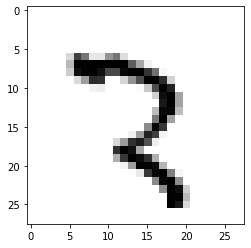

In [97]:
plt.imshow(x_train[500], cmap=plt.cm.binary)

In [98]:
print(y_train[500])

3


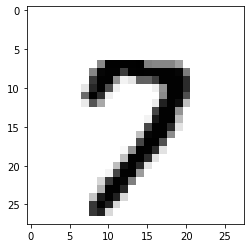

388 번째 이미지의 숫자는 바로  7 입니다.


In [99]:
# index에 0에서 59999사이의 숫자를 지정해보세요.
index = 387
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index+1), "번째 이미지의 숫자는 바로 ", y_train[index],'입니다.')

In [100]:
import numpy as np
print( '최소값', np.min(x_train), '최대값', np.max(x_train))


최소값 0 최대값 255


In [101]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
print( '최소값', np.min(x_train_norm), '최대값', np.max(x_test_norm))

최소값 0.0 최대값 1.0


In [102]:
x_train = x_train_norm.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test_norm.reshape(x_test.shape[0], 784).astype('float32')

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [103]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [104]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1)

Epoch 1/10
270/270 [==============================] - 5s 15ms/step - loss: 0.2715 - accuracy: 0.9219 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 2/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0968 - accuracy: 0.9712 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 3/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0767 - val_accuracy: 0.9767
Epoch 4/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0721 - val_accuracy: 0.9813
Epoch 5/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0736 - val_accuracy: 0.9808
Epoch 6/10
270/270 [==============================] - 4s 14ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0762 - val_accuracy: 0.9812
Epoch 7/10
270/270 [==============================] - 4s 14ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0742 - val_accuracy: 0.9805

In [106]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test loss : {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

313/313 - 1s - loss: 0.0697 - accuracy: 0.9809
test loss : 0.06967885792255402
test_accuracy: 0.98089998960495


In [107]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

In [108]:
idx = 0
print('model.predict() 결과 :',predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ',predicted_labels[idx])
print('실제 데이터의 라벨 :',y_test[idx])

model.predict() 결과 : [3.6833427e-09 5.3805232e-10 8.1481648e-09 1.0955570e-07 1.0067402e-15
 1.7612065e-09 4.2840987e-15 9.9999988e-01 8.4988694e-10 9.6487618e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [109]:
x_test_result = x_test.reshape(x_test.shape[0], 28, 28)

In [110]:
x_test_result.shape

(10000, 28, 28)

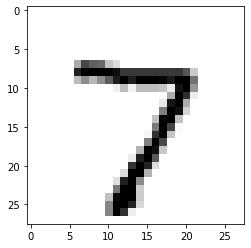

In [111]:
plt.imshow(x_test_result[idx], cmap=plt.cm.binary)
plt.show()

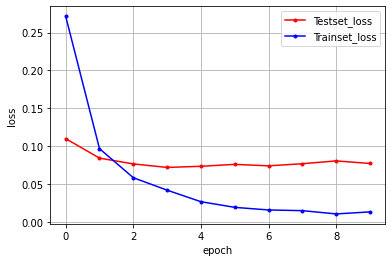

In [112]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()